In [10]:
# logistic 分类问题
import torchvision
import torch
import torch.nn.functional as F

In [11]:
# trains_set = torchvision.datasets.MNIST(root='/dataset/minist', train=True, download=False)
# train_set = torchvision.datasets.CIFAR10(root='/dataset/cifar10', train=True, download=False)

In [14]:
x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[0], [0], [1]])
#------------------------------------------------------#
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegressionModel()
#-------------------------------------------------------# 
# 二分类的交叉熵，对每个批量求均值，求均值和不求均值会影响学习率
criterion = torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
#-------------------------------------------------------#
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch=", epoch, "loss", loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/home/fl/miniconda3/envs/DTox/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


epoch= 0 loss 4.265442371368408
epoch= 1 loss 4.172876358032227
epoch= 2 loss 4.082298278808594
epoch= 3 loss 3.993781566619873
epoch= 4 loss 3.9073984622955322
epoch= 5 loss 3.823216199874878
epoch= 6 loss 3.741299867630005
epoch= 7 loss 3.661710023880005
epoch= 8 loss 3.584500551223755
epoch= 9 loss 3.5097219944000244
epoch= 10 loss 3.437417984008789
epoch= 11 loss 3.3676228523254395
epoch= 12 loss 3.3003642559051514
epoch= 13 loss 3.2356629371643066
epoch= 14 loss 3.173529624938965
epoch= 15 loss 3.113966226577759
epoch= 16 loss 3.0569653511047363
epoch= 17 loss 3.0025110244750977
epoch= 18 loss 2.950578212738037
epoch= 19 loss 2.901132583618164
epoch= 20 loss 2.8541319370269775
epoch= 21 loss 2.8095264434814453
epoch= 22 loss 2.767258882522583
epoch= 23 loss 2.727264881134033
epoch= 24 loss 2.6894755363464355
epoch= 25 loss 2.6538162231445312
epoch= 26 loss 2.620208740234375
epoch= 27 loss 2.5885703563690186
epoch= 28 loss 2.5588181018829346
epoch= 29 loss 2.5308661460876465
epoch=

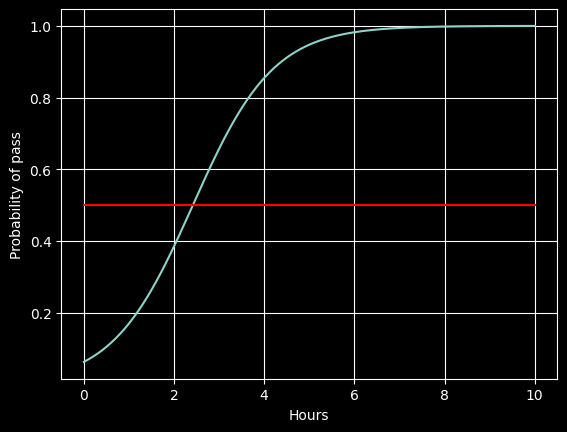

In [19]:
import numpy as np
import matplotlib.pyplot as plt 

x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view((200, 1))
y_t = model(x_t)
y = y_t.data.numpy()
plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of pass')
plt.grid()
plt.show()